<a href="https://colab.research.google.com/github/PrasadWalvekar700/Prasad-Walvekar/blob/master/Machine_Learning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1.Import Libraries**


In [2]:
#importing the pandas, numpy, seaborn, matplotlib libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
sb.set(color_codes=True)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


*Frame loading*

In [3]:
#loading the frame with a csv file
frame=pd.read_csv("data.csv")
frame.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [4]:
#Checking for total number of rows and columns in the frame
frame.shape

(11914, 16)

In [5]:
#using describe function for checking the duplicates
frame.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [6]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

**2.Dropping irrelevant columns**

In [7]:
#as market category has most null values we can choose market category column to dropped, as it will not be useful in the future modeling 
#as well as we can drop the column 'number of doors' becoz the doors cannot predict the price of the car, and the standard deviation value for 'number of doors' is nearly equal to 0
#Dropping the 'Market Category' column
frame=frame.drop("Market Category",axis=1)

In [8]:
#dropping the 'Number of Doors' columns
frame=frame.drop("Number of Doors",axis=1)

In [9]:
#Getting the information of the frame
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Vehicle Size       11914 non-null  object 
 9   Vehicle Style      11914 non-null  object 
 10  highway MPG        11914 non-null  int64  
 11  city mpg           11914 non-null  int64  
 12  Popularity         11914 non-null  int64  
 13  MSRP               11914 non-null  int64  
dtypes: float64(2), int64(5), object(7)
memory usage: 1.3+ MB


In [10]:
#Checking for total number of columns and rows in the frame after dropping the 2 columns
frame.shape

(11914, 14)

*Checking for sum of NaN values for the columns*

In [11]:
#Checking for the columns contianing the NaN values
frame.isnull().sum()

Make                  0
Model                 0
Year                  0
Engine Fuel Type      3
Engine HP            69
Engine Cylinders     30
Transmission Type     0
Driven_Wheels         0
Vehicle Size          0
Vehicle Style         0
highway MPG           0
city mpg              0
Popularity            0
MSRP                  0
dtype: int64

*Imputing for 'Engine Fuel Type', 'Engine HP', 'Engine Cylinders'*

In [12]:
#filling the NaN values
frame["Engine Fuel Type"].fillna(value="Unknown",inplace=True)
frame["Engine HP"].fillna(value=0.0,inplace=True)
frame["Engine Cylinders"].fillna(value=0.0,inplace=True)

In [13]:
#Again checking for the NaN values after filling into those void places
frame.isnull().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

In [14]:
#checking for the datatypes of the columns
frame.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

**3. Renaming the columns**

In [15]:
#renaming the columns 'Engine HP' as 'HP', 'Engine Cylinders' as 'Cylinders', 'Transmission Type' as 'Transmission',
#'Driven_Wheels' as 'Drive Mode', 'highway MPG' as 'MPG-H', 'city MPG' as 'MPG-C', 'MSRP' as 'Price'
frame=frame.rename(columns={"Engine HP":"HP","Engine Cylinders":"Cylinders","Transmission Type":"Transmission","Driven_Wheels":"Drive Mode","highway MPG":"MPG-H","city mpg":"MPG-C","MSRP":"Price"})

In [16]:
#Getting the information after renaming certain columns, to check whether they have correctly renamed or not
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Make              11914 non-null  object 
 1   Model             11914 non-null  object 
 2   Year              11914 non-null  int64  
 3   Engine Fuel Type  11914 non-null  object 
 4   HP                11914 non-null  float64
 5   Cylinders         11914 non-null  float64
 6   Transmission      11914 non-null  object 
 7   Drive Mode        11914 non-null  object 
 8   Vehicle Size      11914 non-null  object 
 9   Vehicle Style     11914 non-null  object 
 10  MPG-H             11914 non-null  int64  
 11  MPG-C             11914 non-null  int64  
 12  Popularity        11914 non-null  int64  
 13  Price             11914 non-null  int64  
dtypes: float64(2), int64(5), object(7)
memory usage: 1.3+ MB


**4. Checking for any duplicates, null, missing valued rows and removing them**

In [17]:
frame.shape

(11914, 14)

In [18]:
#Checking for duplicate rows in the frame
frame.describe()

,Year,HP,Cylinders,MPG-H,MPG-C,Popularity,Price
count,11914.000000,11914.000000,11914.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,247.941749,5.614655,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,110.507669,1.800554,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,0.000000,0.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.000000,4.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,225.000000,6.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.000000,6.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.000000,16.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [19]:
#Duplicate rows in the frame
frame.duplicated().sum()

721

In [20]:
#Dropping the duplicated rows from the frame
frame.drop_duplicates(keep='first', inplace=True)

In [21]:
#Checking for total number of rows and columns after droppin certain rows
frame.shape

(11193, 14)

In [22]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11193 entries, 0 to 11913
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Make              11193 non-null  object 
 1   Model             11193 non-null  object 
 2   Year              11193 non-null  int64  
 3   Engine Fuel Type  11193 non-null  object 
 4   HP                11193 non-null  float64
 5   Cylinders         11193 non-null  float64
 6   Transmission      11193 non-null  object 
 7   Drive Mode        11193 non-null  object 
 8   Vehicle Size      11193 non-null  object 
 9   Vehicle Style     11193 non-null  object 
 10  MPG-H             11193 non-null  int64  
 11  MPG-C             11193 non-null  int64  
 12  Popularity        11193 non-null  int64  
 13  Price             11193 non-null  int64  
dtypes: float64(2), int64(5), object(7)
memory usage: 1.3+ MB


**5. Checking for the outliers and removing them.**

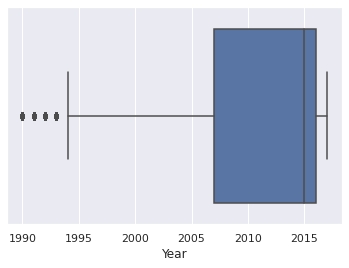

In [23]:
#We can check for the outliers using the boxplot() function, we can apply the boxplot function separatly for each numerical type of column as follows 
#checking outliers for Year
sb.boxplot(x=frame['Year'])

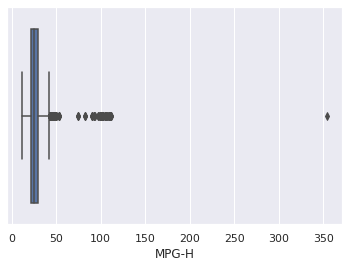

In [24]:
#checking outliers for MPG=H
sb.boxplot(x=frame['MPG-H'])

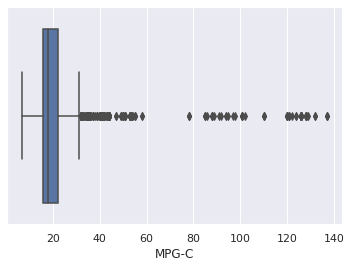

In [25]:
#checking outliers for MPG-C
sb.boxplot(x=frame['MPG-C'])

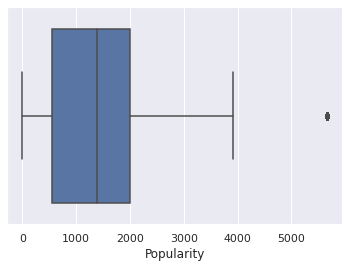

In [26]:
#checking outliers for Popularity
sb.boxplot(x=frame['Popularity'])

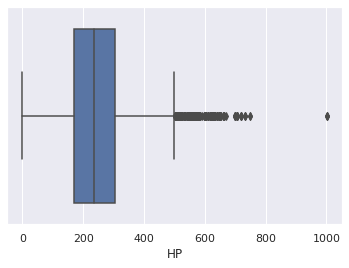

In [27]:
#checking outliers for HP
sb.boxplot(x=frame['HP'])

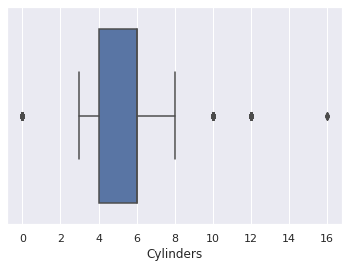

In [28]:
#checking outliers for Cylinders
sb.boxplot(x=frame['Cylinders'])

In [29]:
#checking for total number of outliers from the columns
q1=frame.quantile(0.25)
q3=frame.quantile(0.75)
iqr=q3-q1
iqr

Year              9.0
HP              133.0
Cylinders         2.0
MPG-H             8.0
MPG-C             6.0
Popularity     1460.0
Price         21440.0
dtype: float64

*We can see the outliers from the above cell, so we can directly remove the values which are less than 'Q1-1.5' and greater than 'Q3+1.5'.*

In [30]:
#Dropping the outliers from the frame
frame=frame[~((frame<(q1-1.5*iqr))|(frame>(q3+1.5*iqr))).any(axis=1)]

In [31]:
#checking for total number of rows and columns in the frame after dropping the outliers
frame.shape

(8622, 14)

**6. Car brands are the most represented in the dataset and to the average price among
the top car brands.**

In [32]:
#retrieving top 10 car brands
count=frame['Make'].value_counts()*100/sum(frame['Make'].value_counts())
TopCars=count.index[:10]

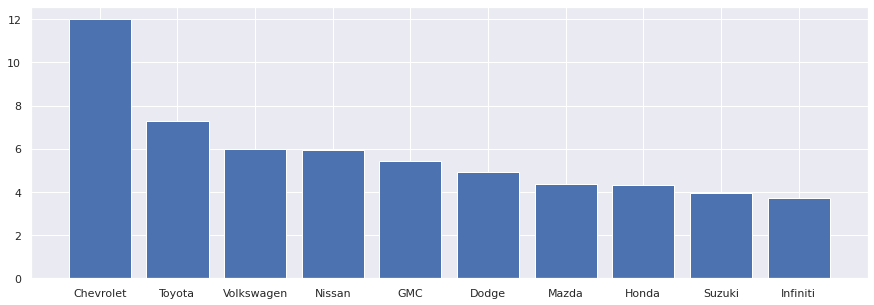

In [33]:
#plotting the bar graph
plt.figure(figsize=(15,5))
plt.bar(TopCars,height=count[:10])
plt.show()

<function matplotlib.pyplot.show>

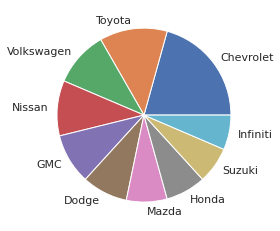

In [34]:
#plotting the pie chart for top 10 car brands 
l=count.index[:10]
plt.pie(x=count[:10],labels=l,data=TopCars)
plt.show

In [35]:
#finding average price for the top car brands
prices=frame[['Make','Price']].loc[(frame['Make']=='Chevrolet')|
                                     (frame['Make']=='Volkswagen')|
                                     (frame['Make']=='Toyota')|
                                     (frame['Make']=='Nissan')|
                                     (frame['Make']=='GMC')|
                                     (frame['Make']=='Dodge')|
                                     (frame['Make']=='Mazda')|
                                     (frame['Make']=='Honda')|
                                     (frame['Make']=='Suzuki')|
                                     (frame['Make']=='Infiniti')].groupby('Make').mean()
prices

,Price
Make,
Chevrolet,28252.488395
Dodge,26076.722353
GMC,33261.400853
Honda,27381.364611
Infiniti,43127.822981
Mazda,20495.820106
Nissan,28352.543860
Suzuki,18168.241888
Toyota,29011.750397


**7. Plotting the Correlation Matrix**


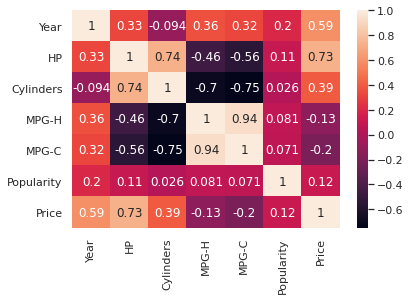

In [36]:
#Plotting the Correlation Matrix
CMatrix=frame.corr()
sb.heatmap(CMatrix,annot=True)

*What we understand by the above correlation matrix is that-*

1.   The MPG-H and MPG-C are negatively dependent on Cylinders, that means as the cylinders in a car increases the mileage on highway and city highly decrease i,e Cylinders and MPG-H, MPG-C are inversely proportional to each other.
2.   The Price and HP(Horse power) are positively dependent on each other which means that the price and HP are directly proportional to each other i,e as the Horse power of a car increases the price for that car also increases.
3.    The HP(Horse Power) and the cylinders are positively dpendent i,e as the Cylinders for a car increases the Horse power for that car also increases.
4.    The Year and Price are positively dependent which means price for a car increases as the changes(or increases), because after a year are upgradation for some certain cars which reaults in the increases in price.

**8. Plotting different graphs with respect to price of the cars and other attributes of the cars**

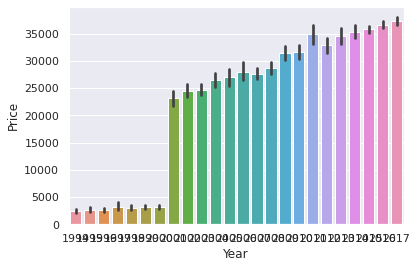

In [39]:
#Plotting bar graph for 'Price' with respect to 'Year'
sb.barplot(x=frame['Year'],y=frame['Price'])

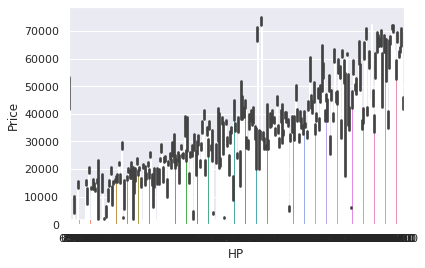

In [40]:
#Plotting bar graph for 'Price' with respect to 'HP'
sb.barplot(x=frame['HP'],y=frame['Price'])

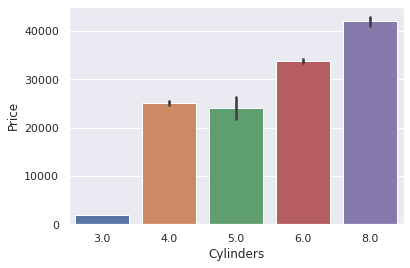

In [41]:
#Plotting bar graph for 'Price' with respect to 'Cylinders'
sb.barplot(x=frame['Cylinders'],y=frame['Price'])

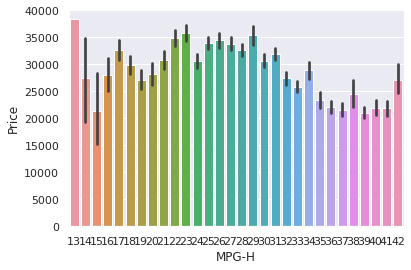

In [42]:
#Plotting bar graph for 'Price' with respect to 'MPG-H'
sb.barplot(x=frame['MPG-H'],y=frame['Price'])

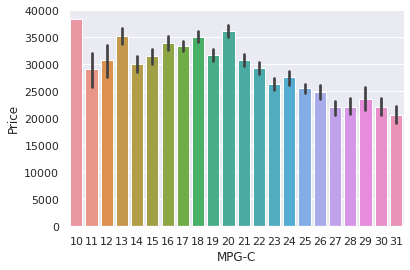

In [43]:
#Plotting bar graph for 'Price' with respect to 'MPG-C'
sb.barplot(x=frame['MPG-C'],y=frame['Price'])

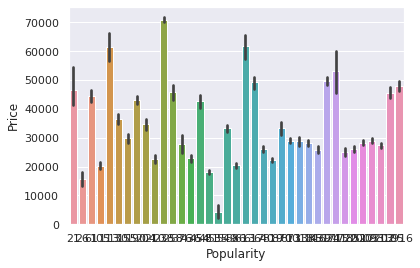

In [44]:
#Plotting bar graph for 'Price' with respect to 'Popularity'
sb.barplot(x=frame['Popularity'],y=frame['Price'])

**9. Splitting the dataset into 80 and 20 ratio and building a Machine Learning model with Price a target variable**

In [46]:
#Importing the Label Encoder to Encode the Categorical data
from sklearn.preprocessing import LabelEncoder
cate = frame.select_dtypes(exclude=[np.number]).columns
labelen = LabelEncoder()
for i in cate:
  frame[i] = labelen.fit_transform(frame[i])
print('Label Encoded Data')
frame.head(5)

Label Encoded Data


,Make,Model,Year,Engine Fuel Type,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,3,1,2011,8,335.0,6.0,2,3,0,8,26,19,3916,46135
1,3,0,2011,8,300.0,6.0,2,3,0,6,28,19,3916,40650
2,3,0,2011,8,300.0,6.0,2,3,0,8,28,20,3916,36350
3,3,0,2011,8,230.0,6.0,2,3,0,8,28,18,3916,29450
4,3,0,2011,8,230.0,6.0,2,3,0,6,28,18,3916,34500


In [66]:
c = frame[['Popularity', 'Year', 'HP', 'Cylinders', 'MPG-H', 'MPG-C']].values
v = frame['Price'].values

In [67]:
#applyimg the scaling
from sklearn.preprocessing import StandardScaler
s1 = StandardScaler()
s2 = StandardScaler()
c = s1.fit_transform(c)
v = s2.fit_transform(v.reshape(-1,1))

In [71]:
#Splitting the frame/dataset into test set and training set
from sklearn.model_selection import train_test_split
X_Train, X_Test, y_train, y_test=train_test_split(c,v,test_size=0.2,random_state=0)
print(X_Train.shape, y_train.shape)
print(X_Test.shape, y_test.shape)

(6897, 6) (6897, 1)
(1725, 6) (1725, 1)


In [72]:
#Fit in a model
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model=lm.fit(X_Train, y_train)
predictions = lm.predict(X_Test)

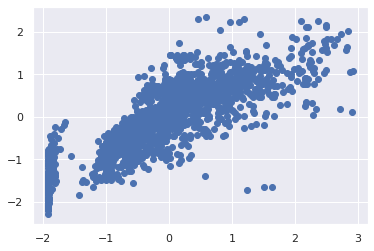

In [73]:
plt.scatter(y_test,predictions)

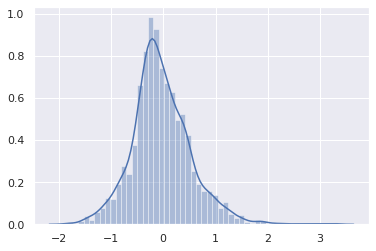

In [74]:
sb.distplot((y_test-predictions),bins=50)

In [75]:
from sklearn import metrics
print("Mean abs error",metrics.mean_absolute_error(y_test,predictions))
print("Root mean squared error",np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print("R2 score",metrics.r2_score(y_test,predictions))

Mean abs error 0.4312727394626057
Root mean squared error 0.5727035606478215
R2 score 0.6539661973682926


**10. Finding the R square, MAE, RMSE using different algorithms**

*1. Fitting Random Forest Regression*

In [102]:
#Predicting the preice using the random forest alogorithm
from sklearn.ensemble import RandomForestRegressor
r1 = RandomForestRegressor(n_estimators = 300, random_state = 0)
r1.fit(X_Train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

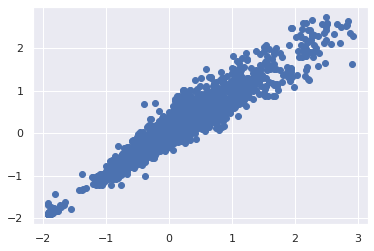

In [106]:
p1 = r1.predict(X_Test)
plt.scatter(y_test,p1)

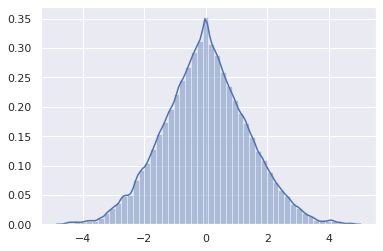

In [107]:
sb.distplot((y_test-p1),bins=50)

In [112]:
#Finding MAE, RMSE, R2 score using Random Forest regression algorithm
print("MAE, RMSE, R2 score using Random Forest regression algorithm") 
print('MAE:', metrics.mean_absolute_error(y_test, predictions))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2 Score:', metrics.r2_score(y_test, predictions))

MAE, RMSE, R2 score using Random Forest regression algorithm
MAE: 0.17965231350293873
RMSE: 0.2473719770253874
R2 Score: 0.9354405593644656


*2. Fitting Support Vector Machine*

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


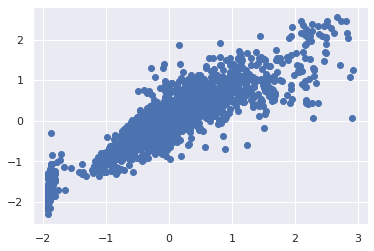

In [109]:
#Predicting the price using 'SVR' algorithm
from sklearn.svm import SVR
r2 = SVR(kernel = 'rbf')
r2.fit(X_Train, y_train)
p2 = r2.predict(X_Test)
plt.scatter(y_test,p2)

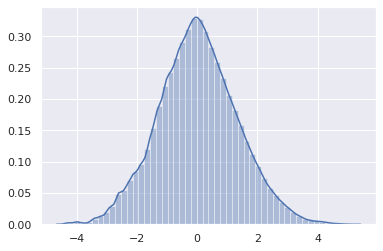

In [110]:
sb.distplot((y_test-p2),bins=50)

In [113]:
#FInding MAE, RMSE, R2 score using SVR algorithm
print("MAE, RMSE, R2 score using SVR algorithm")
print('MAE:', metrics.mean_absolute_error(y_test, p2))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, p2)))
print('R2 Score:', metrics.r2_score(y_test, p2))

MAE, RMSE, R2 score using SVR algorithm
MAE: 0.29780915039619005
RMSE: 0.4204580952307925
R2 Score: 0.813489109395901


*3. Fitting Polynomial regression*

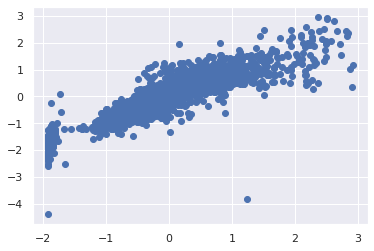

In [114]:
#Predicting the price using the Polynomial regression algorithm
from sklearn.preprocessing import PolynomialFeatures
r3 = PolynomialFeatures(degree = 4)
x= r3.fit_transform(X_Train)
r3.fit(x, y_train)
lm1 = LinearRegression()
lm1.fit(x, y_train)
p3=lm1.predict(r3.fit_transform(X_Test))
plt.scatter(y_test,p3)

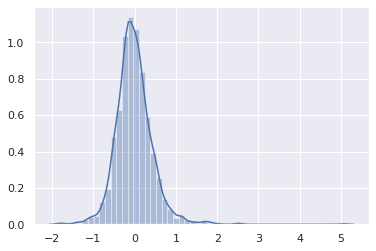

In [115]:
sb.distplot((y_test-p3),bins=50)

In [117]:
#FInding MAE, RMSE, R2 score using Polynomial Regression algorithm
print("MAE, RMSE, R2 score using Polynomial Regression algorithm")
print('MAE:', metrics.mean_absolute_error(y_test, p3))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, p3)))
print('R2 Score:', metrics.r2_score(y_test, p3))

MAE, RMSE, R2 score using Polynomial Regression algorithm
MAE: 0.32110416834464506
RMSE: 0.44834715720782786
R2 Score: 0.7879259160931822


According to the above fittings we can say that **Random Forest Regression** algorithm fits the dataset more precisely/accurately than other algorithms.